# Mission Launches Data Analysis

This notebook performs exploratory data analysis and preprocessing on mission launches data to prepare it for machine learning classification.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Successfully installed")

## Load and Explore the Dataset

Load the mission launches dataset and perform initial exploration to understand its structure, data types, and identify missing values.

In [2]:
df = pd.read_csv("mission_launches.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Remove Unnecessary Columns

The first two columns appear to be ID columns that don't provide meaningful information for analysis. We'll remove them to simplify our dataset.

In [3]:
df.drop(df.columns[[0, 1]], inplace=True, axis=1)
print("Last 5 rows after dropping ID columns:")
print(df.tail())
df.info()

Last 5 rows after dropping ID columns:
     Organisation                                   Location  \
4319      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                      Detail  Rocket_Status  \
4319  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU  StatusRetired   
4320  Sat Feb 01, 1958 03:48 UTC         Juno I | Explorer 1  StatusRetired   
4321  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3  StatusRetired   
4322  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik-2  StatusRetired   
4323  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik-1  StatusRetired   

     Price Mission_Status  
4319   NaN        Failure  
4320   NaN        Success  
4321   NaN       

## Handle Missing Values and Check for Outliers

This section performs several important data quality checks:
- **Convert Price to numeric**: Ensure the Price column is in the correct data type
- **Drop rows with missing Price**: Since 78% of Price data is missing, we remove these rows as the column is critical for analysis
- **Calculate skewness**: Identify distribution characteristics of numerical columns
- **Detect outliers**: Use boxplots and the IQR (Interquartile Range) method to identify outliers

In [4]:
# Convert Price column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors="coerce")

# Check missing values
print("Missing values in Price column:")
print("-" * 40)
missing_count = df['Price'].isna().sum()
print(f"Price: {missing_count} missing values ({missing_count/len(df)*100:.2f}%)")
print("\nSince 78% of Price data is missing, we'll drop rows with missing Price values")
print("as this column is critical for analysis and too sparse to impute reliably.")

# Drop rows with missing Price
print(f"\nRows before dropping: {len(df)}")
df = df.dropna(subset=['Price'])
print(f"Rows after dropping: {len(df)}")
print(f"Rows removed: {missing_count}")

# Calculate skewness after cleaning
print("\n" + "="*40)
print("Skewness of Price column (after cleaning):")
print("-" * 40)
skewness = df['Price'].skew()
print(f"Price: {skewness:.3f}")


Missing values in Price column:
----------------------------------------
Price: 3375 missing values (78.05%)

Since 78% of Price data is missing, we'll drop rows with missing Price values
as this column is critical for analysis and too sparse to impute reliably.

Rows before dropping: 4324
Rows after dropping: 949
Rows removed: 3375

Skewness of Price column (after cleaning):
----------------------------------------
Price: 1.508


### Outlier Detection and Removal

BEFORE OUTLIER REMOVAL
Total records: 949
Price statistics:
  Min: 5.30
  Max: 450.00
  Mean: 129.80
  Median: 62.00


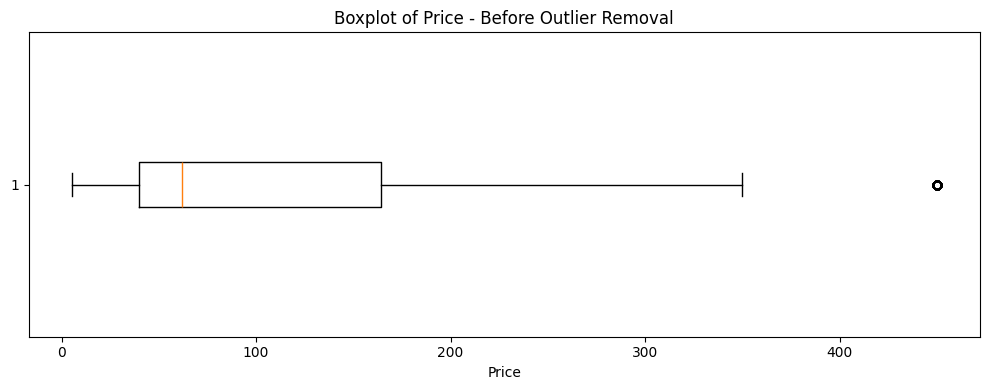


IQR OUTLIER DETECTION
Q1 (25th percentile): 40.00
Q3 (75th percentile): 164.00
IQR (Interquartile Range): 124.00

Outlier bounds:
  Lower bound: -146.00
  Upper bound: 350.00

Outliers detected: 136 records (14.33%)
Records removed: 136
Records remaining: 813

FINAL DATA QUALITY CHECK
Missing values in Price: 0
Price range: [5.30, 350.00]
Price mean: 76.23, median: 50.00
Updated skewness: 1.820

AFTER OUTLIER REMOVAL


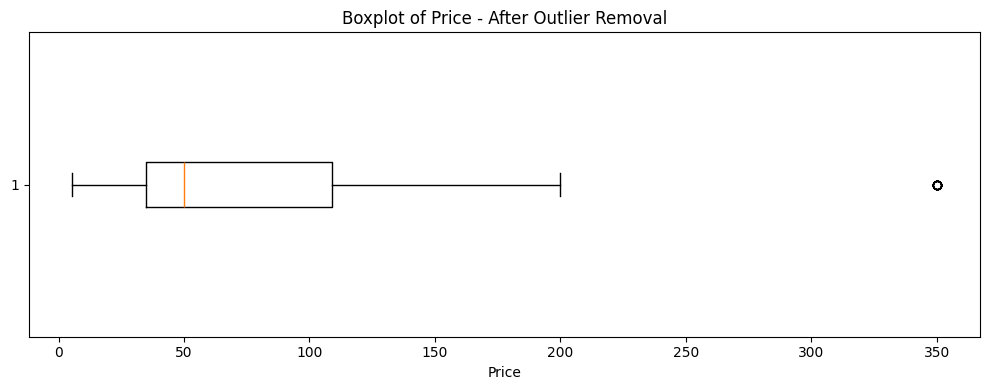

In [5]:
# Visualize before outlier removal
print("="*60)
print("BEFORE OUTLIER REMOVAL")
print("="*60)
print(f"Total records: {len(df)}")
print("Price statistics:")
print(f"  Min: {df['Price'].min():.2f}")
print(f"  Max: {df['Price'].max():.2f}")
print(f"  Mean: {df['Price'].mean():.2f}")
print(f"  Median: {df['Price'].median():.2f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.boxplot(df['Price'], vert=False)
ax.set_title('Boxplot of Price - Before Outlier Removal')
ax.set_xlabel('Price')
plt.tight_layout()
plt.show()

# IQR Method for Outlier Detection and Removal
print("\n" + "="*60)
print("IQR OUTLIER DETECTION")
print("="*60)

# Calculate Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutlier bounds:")
print(f"  Lower bound: {lower_bound:.2f}")
print(f"  Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"\nOutliers detected: {len(outliers)} records ({len(outliers)/len(df)*100:.2f}%)")

# Remove outliers
df_before_removal = len(df)
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df_after_removal = len(df)

print(f"Records removed: {df_before_removal - df_after_removal}")
print(f"Records remaining: {df_after_removal}")

# Verify final data quality
print("\n" + "="*60)
print("FINAL DATA QUALITY CHECK")
print("="*60)
print(f"Missing values in Price: {df['Price'].isna().sum()}")
print(f"Price range: [{df['Price'].min():.2f}, {df['Price'].max():.2f}]")
print(f"Price mean: {df['Price'].mean():.2f}, median: {df['Price'].median():.2f}")
print(f"Updated skewness: {df['Price'].skew():.3f}")

# Visualize after outlier removal
print("\n" + "="*60)
print("AFTER OUTLIER REMOVAL")
print("="*60)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.boxplot(df['Price'], vert=False)
ax.set_title('Boxplot of Price - After Outlier Removal')
ax.set_xlabel('Price')
plt.tight_layout()
plt.show()


## Feature Engineering

### Encode Categorical Variables

Convert categorical variables into numerical format for machine learning:
- **Rocket_Status**: StatusActive → 1, Other → 0
- **Mission_Status**: Success → 1, Failure → 0


In [6]:
# Clean and encode Rocket_Status
df["Rocket_Status"] = df["Rocket_Status"].astype(str).str.strip()
df["Rocket_Status"] = np.where(df["Rocket_Status"] == "StatusActive", 1, 0)

# Clean and encode Mission_Status
df["Mission_Status"] = df["Mission_Status"].astype(str).str.strip()
df["Mission_Status"] = np.where(df["Mission_Status"] == "Success", 1, 0)


print("\nEncoded Rocket_Status values:")
print(f"Distribution: {df['Rocket_Status'].value_counts().to_dict()}")
print("\nEncoded Mission_Status values:")
print(f"Distribution: {df['Mission_Status'].value_counts().to_dict()}")
df.info()




Encoded Rocket_Status values:
Distribution: {1: 586, 0: 227}

Encoded Mission_Status values:
Distribution: {1: 762, 0: 51}
<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    813 non-null    object 
 1   Location        813 non-null    object 
 2   Date            813 non-null    object 
 3   Detail          813 non-null    object 
 4   Rocket_Status   813 non-null    int64  
 5   Price           813 non-null    float64
 6   Mission_Status  813 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 50.8+ KB


### Extract Location and Temporal Features

Create additional features from existing columns:
- **Country**: Extract country from Location
- **Year**: Extract year from Date
- **Month_Name**: Extract month name from Date


In [7]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.month_name()

print("New features created:")
print(f"Unique countries: {df['Country'].unique()}")

print(df.head())

New features created:
Unique countries: ['USA' 'China' 'Kazakhstan' 'Japan' 'New Zealand' 'Russia' 'France'
 'India' 'Yellow Sea' 'Pacific Missile Range Facility' 'Gran Canaria']
  Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5         CASC       LC-9, Taiyuan Satellite Launch Center, China   

                       Date  \
0 2020-08-07 05:12:00+00:00   
1 2020-08-06 04:01:00+00:00   
3 2020-07-30 21:25:00+00:00   
4 2020-07-30 11:50:00+00:00   
5 2020-07-25 03:13:00+00:00   

                                              Detail  Rocket_Status   Price  \
0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky              1   50.00   
1                Long March 2D | Gaofen-9 04 & Q-SAT         

### Handle Missing Temporal Data

Check and remove rows with missing temporal features (Date, Year, Month_Name), as these values are related and necessary for analysis.

In [8]:
print("="*60)
print("HANDLING MISSING TEMPORAL DATA")
print("="*60)

# Check for missing values in temporal columns
print("\nMissing values in temporal features:")
print(f"  Date: {df['Date'].isna().sum()}")
print(f"  Year: {df['Year'].isna().sum()}")
print(f"  Month_Name: {df['Month_Name'].isna().sum()}")

print(f"\nRows before cleaning: {len(df)}")

# Drop rows with missing temporal data
df_before = len(df)
df = df.dropna(subset=['Date', 'Year', 'Month_Name'])
df_after = len(df)

# Verify no missing values remain
missing_after = df.isna().sum()

print(f"\nFinal dataset shape: {df.shape}")


HANDLING MISSING TEMPORAL DATA

Missing values in temporal features:
  Date: 6
  Year: 6
  Month_Name: 6

Rows before cleaning: 813

Final dataset shape: (807, 10)


In [9]:
# 1. Success Rate by Country
print("="*60)
print("SUCCESS RATE BY COUNTRY")
print("="*60)
country_stats = df.groupby('Country').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
country_stats.columns = ['Successful_Missions', 'Total_Missions', 'Success_Rate']
country_stats = country_stats.sort_values('Total_Missions', ascending=False)
print(country_stats)

# 2. Success Rate by Organization
print("\n" + "="*60)
print("TOP 10 ORGANIZATIONS BY LAUNCH COUNT")
print("="*60)
org_stats = df.groupby('Organisation').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
org_stats.columns = ['Successful_Missions', 'Total_Missions', 'Success_Rate']
org_stats = org_stats.sort_values('Total_Missions', ascending=False).head(10)
print(org_stats)

# 3. Success Rate by Month
print("\n" + "="*60)
print("SUCCESS RATE BY MONTH")
print("="*60)
month_stats = df.groupby('Month_Name').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
month_stats.columns = ['Successful_Missions', 'Total_Launches', 'Success_Rate']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_stats = month_stats.reindex([m for m in month_order if m in month_stats.index])
print(month_stats)

# 4. Average Price by Rocket Status
print("\n" + "="*60)
print("AVERAGE PRICE BY ROCKET STATUS")
print("="*60)
price_by_status = df.groupby('Rocket_Status')['Price'].agg(['mean', 'median', 'std', 'count']).round(2)
price_by_status.index = ['Inactive', 'Active']
print(price_by_status)


SUCCESS RATE BY COUNTRY
              Successful_Missions  Total_Missions  Success_Rate
Country                                                        
USA                           314             337         0.932
China                         150             157         0.955
France                         92              95         0.968
India                          58              66         0.879
Russia                         51              54         0.944
Kazakhstan                     39              42         0.929
Japan                          40              40         1.000
New Zealand                    11              13         0.846
Gran Canaria                    2               2         1.000
Yellow Sea                      1               1         1.000

TOP 10 ORGANIZATIONS BY LAUNCH COUNT
              Successful_Missions  Total_Missions  Success_Rate
Organisation                                                   
CASC                          151         

## Statistical Analysis

Perform comprehensive aggregations to understand patterns in the data:
- Mission success rates by country and organization
- Average prices by different categories
- Launch frequency analysis
- Temporal trends


## Data Visualizations

### Price Distribution Analysis

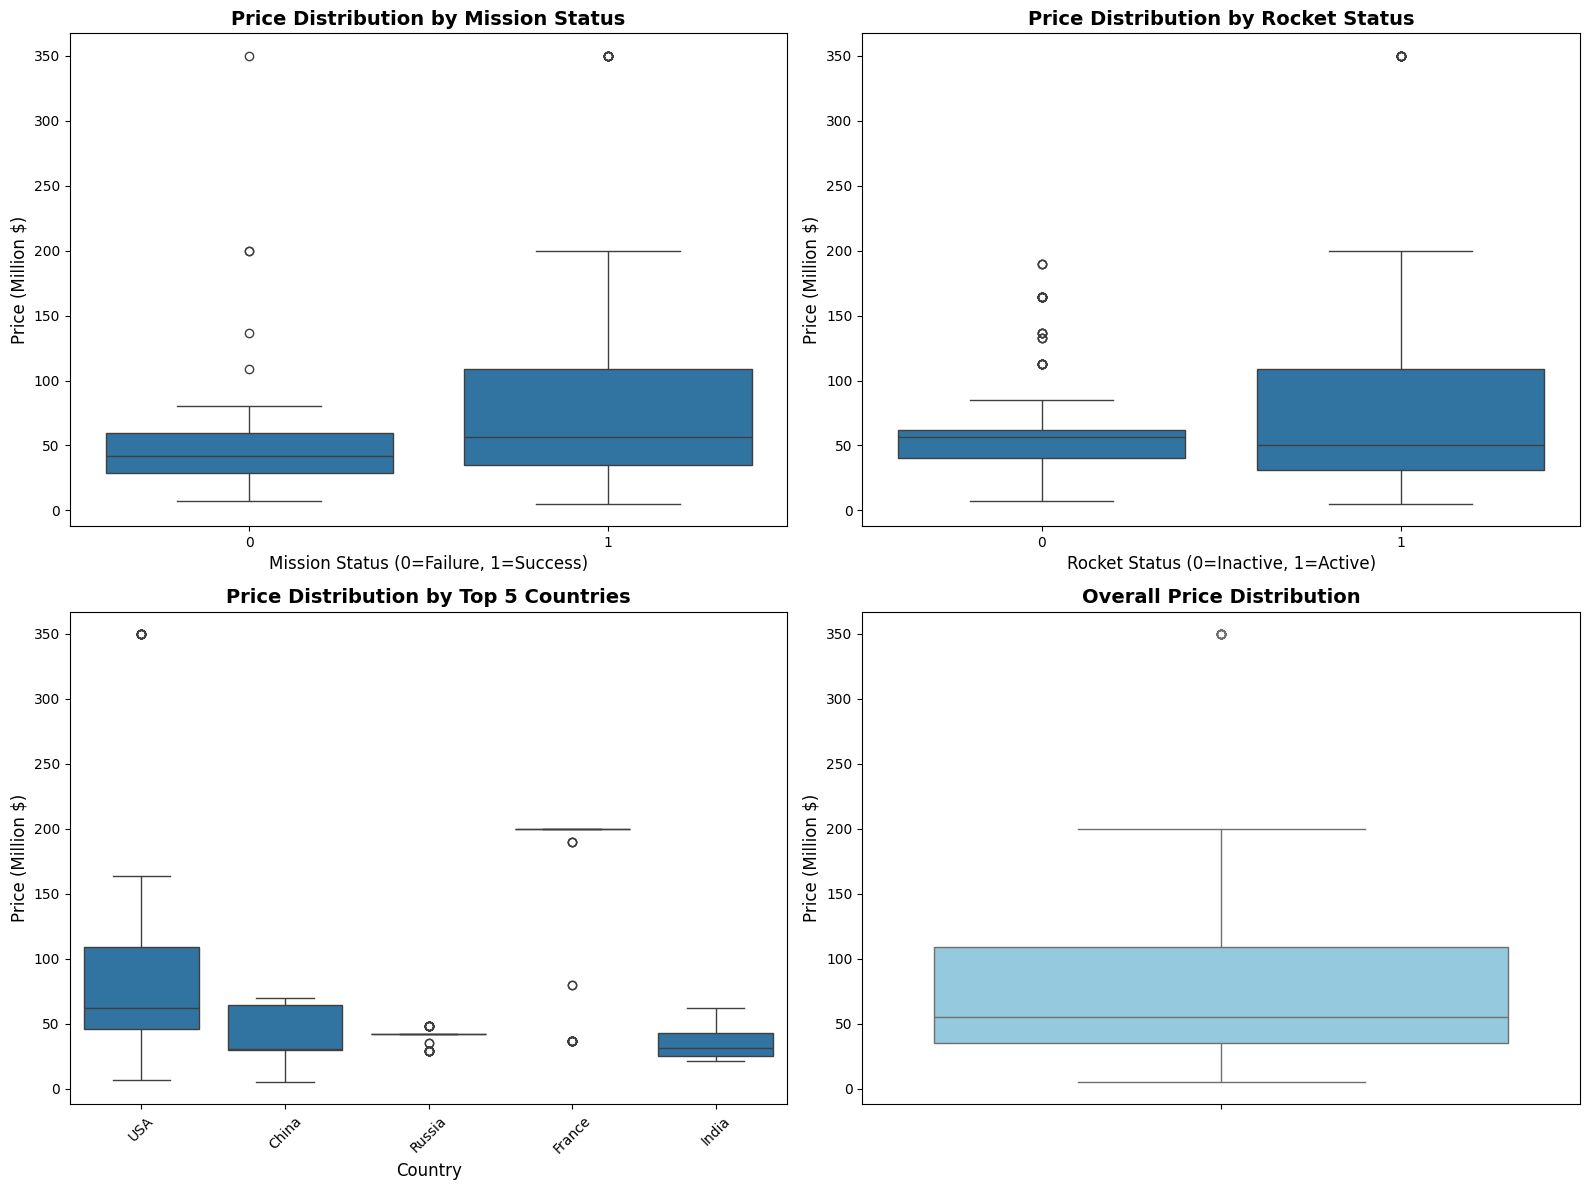

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution by Mission Status
sns.boxplot(data=df, x='Mission_Status', y='Price', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Mission Status', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Mission Status (0=Failure, 1=Success)', fontsize=12)
axes[0, 0].set_ylabel('Price (Million $)', fontsize=12)

# Price distribution by Rocket Status
sns.boxplot(data=df, x='Rocket_Status', y='Price', ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution by Rocket Status', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Rocket Status (0=Inactive, 1=Active)', fontsize=12)
axes[0, 1].set_ylabel('Price (Million $)', fontsize=12)

# Price distribution by Top 5 Countries
top_countries = df['Country'].value_counts().head(5).index
df_top_countries = df[df['Country'].isin(top_countries)]
sns.boxplot(data=df_top_countries, x='Country', y='Price', ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Top 5 Countries', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Country', fontsize=12)
axes[1, 0].set_ylabel('Price (Million $)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Overall price distribution
sns.boxplot(data=df, y='Price', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Overall Price Distribution', fontsize=14, weight='bold')
axes[1, 1].set_ylabel('Price (Million $)', fontsize=12)

plt.tight_layout()
plt.show()


### Status Distribution - Mission and Rocket Status

### Correlation Analysis

CORRELATION MATRIX
                Rocket_Status  Price  Mission_Status   Year
Rocket_Status           1.000  0.135           0.120  0.323
Price                   0.135  1.000           0.083  0.071
Mission_Status          0.120  0.083           1.000  0.100
Year                    0.323  0.071           0.100  1.000


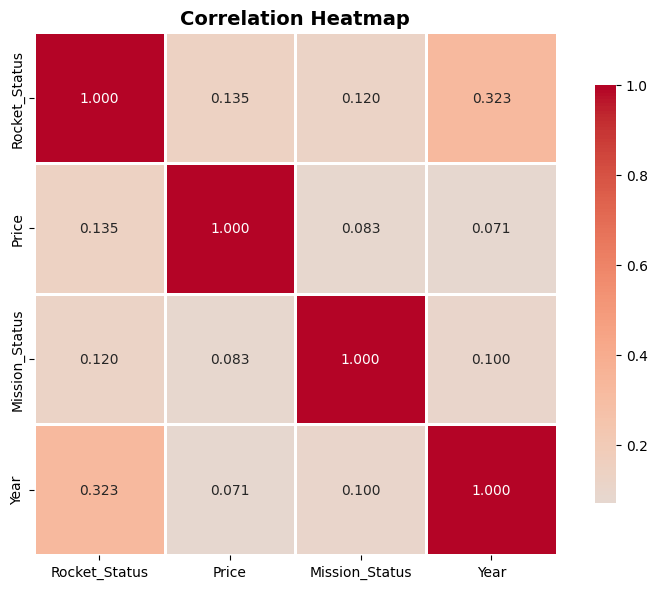

In [11]:
# Calculate correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr().round(3)

print("="*60)
print("CORRELATION MATRIX")
print("="*60)
print(corr_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Categorical Analysis - Countries and Organizations

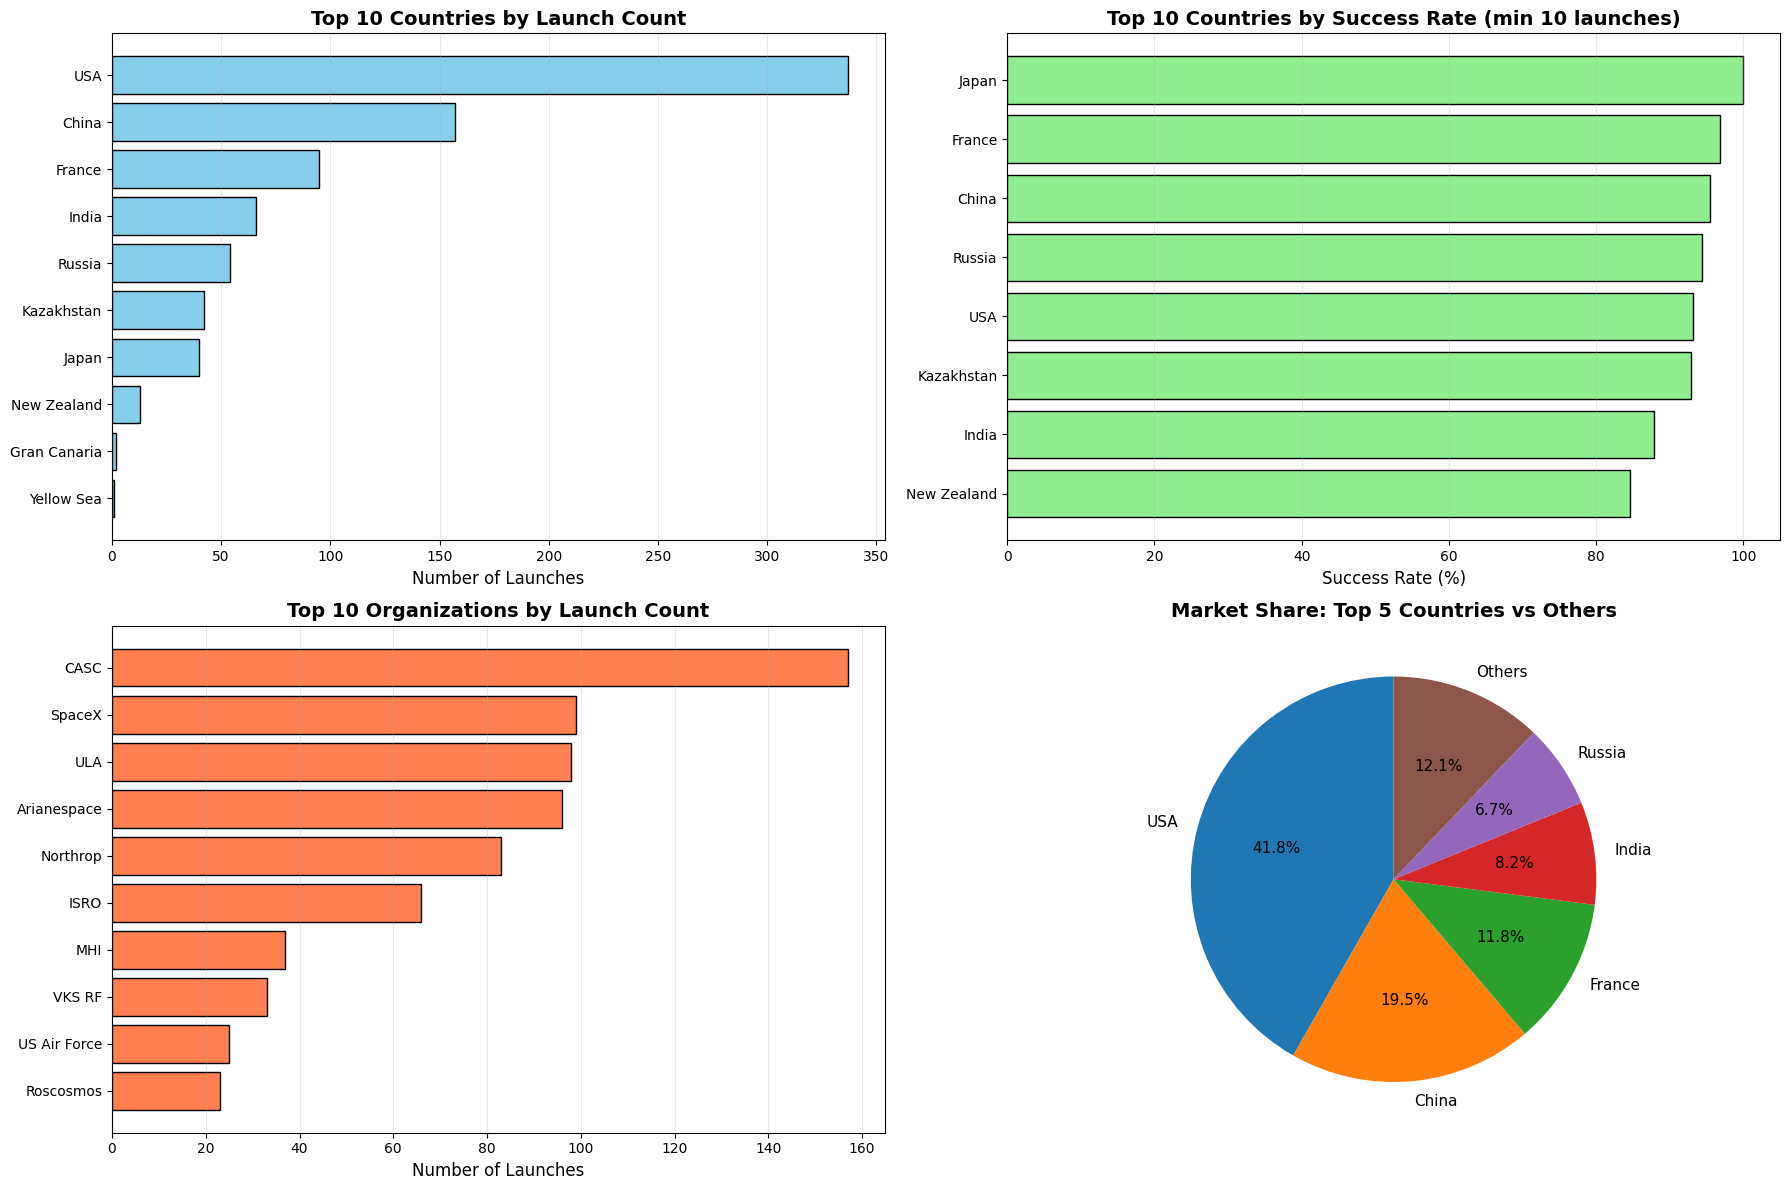

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top 10 countries by launch count
top_countries = df['Country'].value_counts().head(10)
axes[0, 0].barh(range(len(top_countries)), top_countries.values, color='skyblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_countries)))
axes[0, 0].set_yticklabels(top_countries.index)
axes[0, 0].set_xlabel('Number of Launches', fontsize=12)
axes[0, 0].set_title('Top 10 Countries by Launch Count', fontsize=14, weight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# Success rate by top 10 countries (minimum 10 launches)
country_success = df.groupby('Country').agg({
    'Mission_Status': 'mean',
    'Country': 'size'
}).rename(columns={'Country': 'count', 'Mission_Status': 'success_rate'})
country_success = country_success[country_success['count'] >= 10].sort_values('success_rate', ascending=False).head(10)
axes[0, 1].barh(range(len(country_success)), country_success['success_rate'] * 100, color='lightgreen', edgecolor='black')
axes[0, 1].set_yticks(range(len(country_success)))
axes[0, 1].set_yticklabels(country_success.index)
axes[0, 1].set_xlabel('Success Rate (%)', fontsize=12)
axes[0, 1].set_title('Top 10 Countries by Success Rate (min 10 launches)', fontsize=14, weight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# Top 10 organizations by launch count
top_orgs = df['Organisation'].value_counts().head(10)
axes[1, 0].barh(range(len(top_orgs)), top_orgs.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_orgs)))
axes[1, 0].set_yticklabels(top_orgs.index, fontsize=10)
axes[1, 0].set_xlabel('Number of Launches', fontsize=12)
axes[1, 0].set_title('Top 10 Organizations by Launch Count', fontsize=14, weight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# Market share: Top 5 countries vs Others
top_5_countries = df['Country'].value_counts().head(5)
other_count = len(df) - top_5_countries.sum()
pie_data = list(top_5_countries.values) + [other_count]
pie_labels = list(top_5_countries.index) + ['Others']
axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, 
               textprops={'fontsize': 11})
axes[1, 1].set_title('Market Share: Top 5 Countries vs Others', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


### Temporal Analysis - Trends Over Time

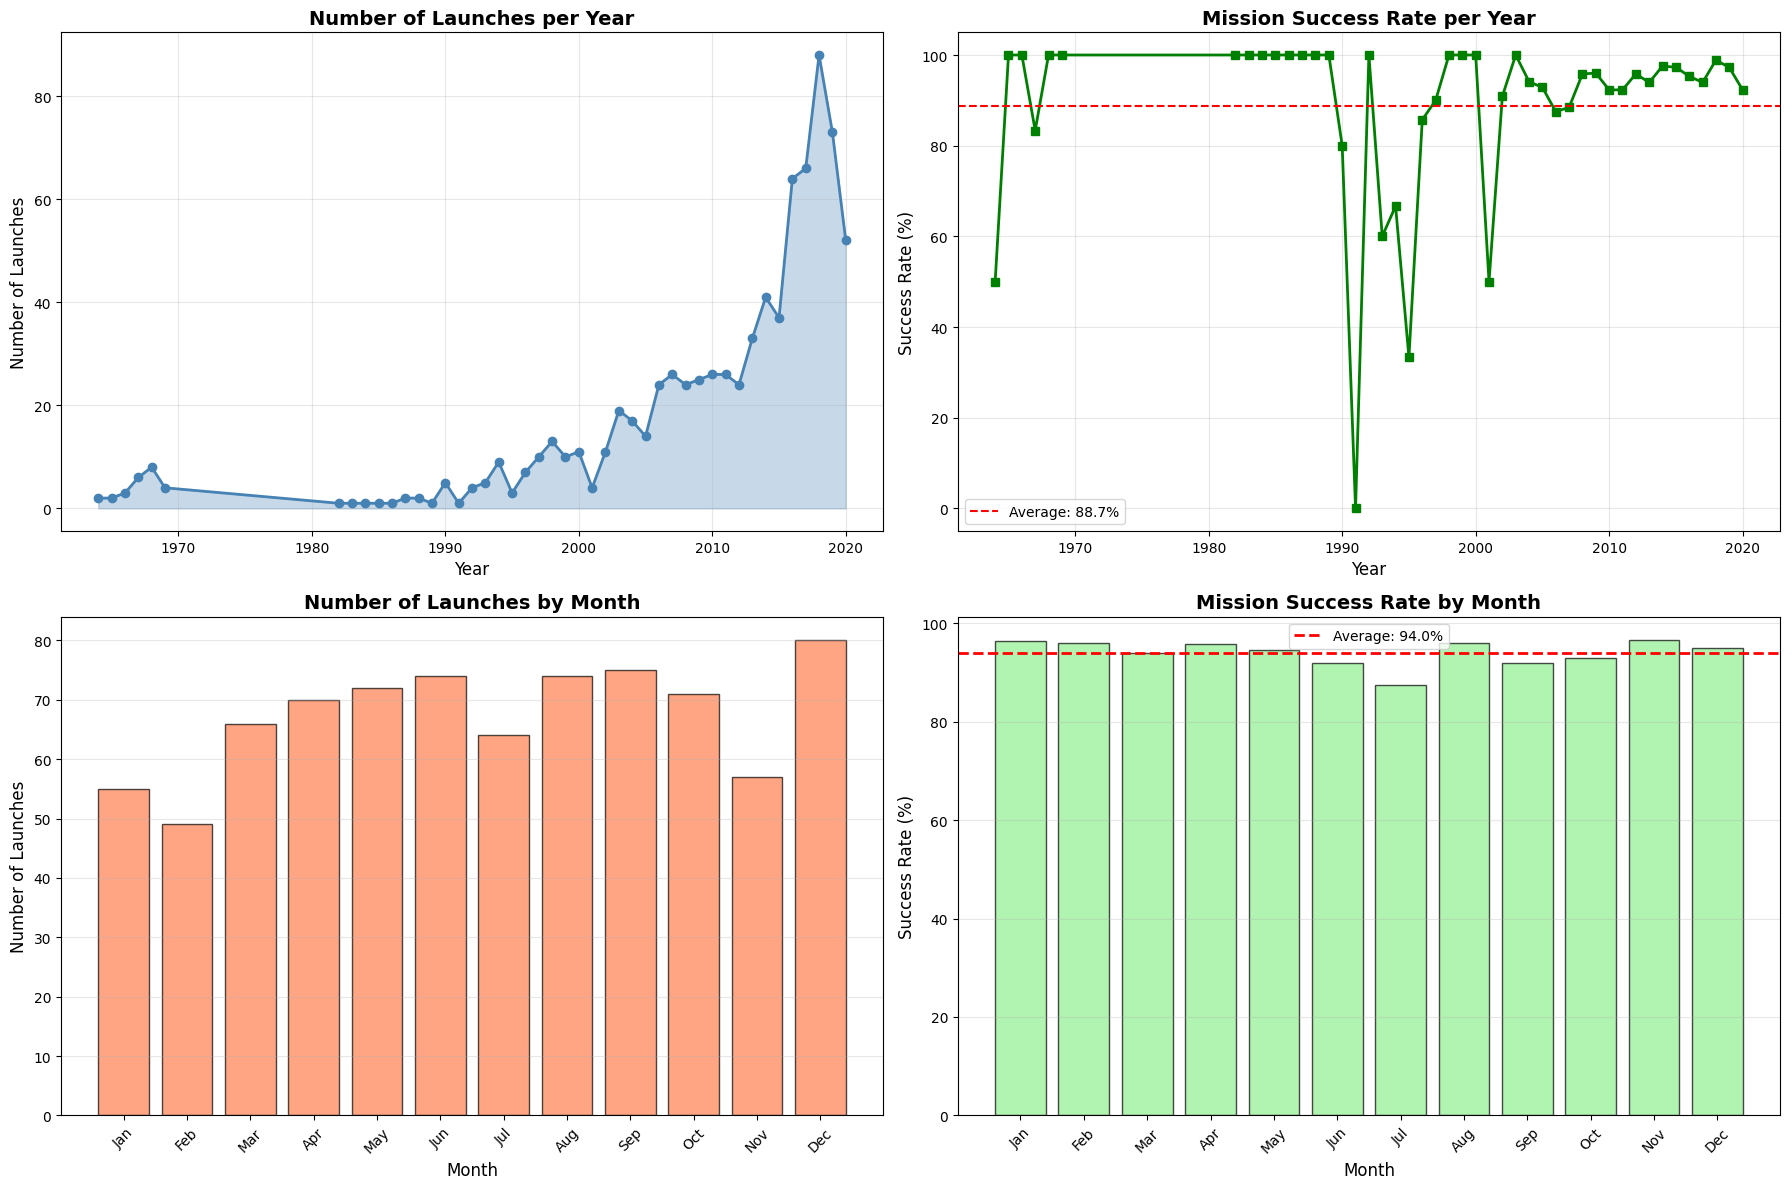


TEMPORAL INSIGHTS
Month with most launches: December (80 launches)
Month with least launches: February (49 launches)
Month with highest success rate: November (96.49%)
Month with lowest success rate: July (87.50%)


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Launches per year
yearly_data = df.groupby('Year').size()
axes[0, 0].plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0, 0].fill_between(yearly_data.index, yearly_data.values, alpha=0.3, color='steelblue')
axes[0, 0].set_title('Number of Launches per Year', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Launches', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Success rate over years
yearly_success = df.groupby('Year')['Mission_Status'].mean() * 100
axes[0, 1].plot(yearly_success.index, yearly_success.values, marker='s', linewidth=2, markersize=6, color='green')
axes[0, 1].axhline(y=yearly_success.mean(), color='red', linestyle='--', label=f'Average: {yearly_success.mean():.1f}%')
axes[0, 1].set_title('Mission Success Rate per Year', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Success Rate (%)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Launches by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df['Month_Name'].value_counts().reindex(month_order)
axes[1, 0].bar(range(12), monthly_data.values, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[1, 0].set_title('Number of Launches by Month', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Number of Launches', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Success rate by month
monthly_success = df.groupby('Month_Name')['Mission_Status'].mean().reindex(month_order) * 100
axes[1, 1].bar(range(12), monthly_success.values, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axhline(y=monthly_success.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Average: {monthly_success.mean():.1f}%')
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[1, 1].set_title('Mission Success Rate by Month', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Success Rate (%)', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print temporal insights
print("\n" + "="*60)
print("TEMPORAL INSIGHTS")
print("="*60)
print(f"Month with most launches: {monthly_data.idxmax()} ({monthly_data.max()} launches)")
print(f"Month with least launches: {monthly_data.idxmin()} ({monthly_data.min()} launches)")
print(f"Month with highest success rate: {monthly_success.idxmax()} ({monthly_success.max():.2f}%)")
print(f"Month with lowest success rate: {monthly_success.idxmin()} ({monthly_success.min():.2f}%)")


### Distribution Shape Analysis - Skewness

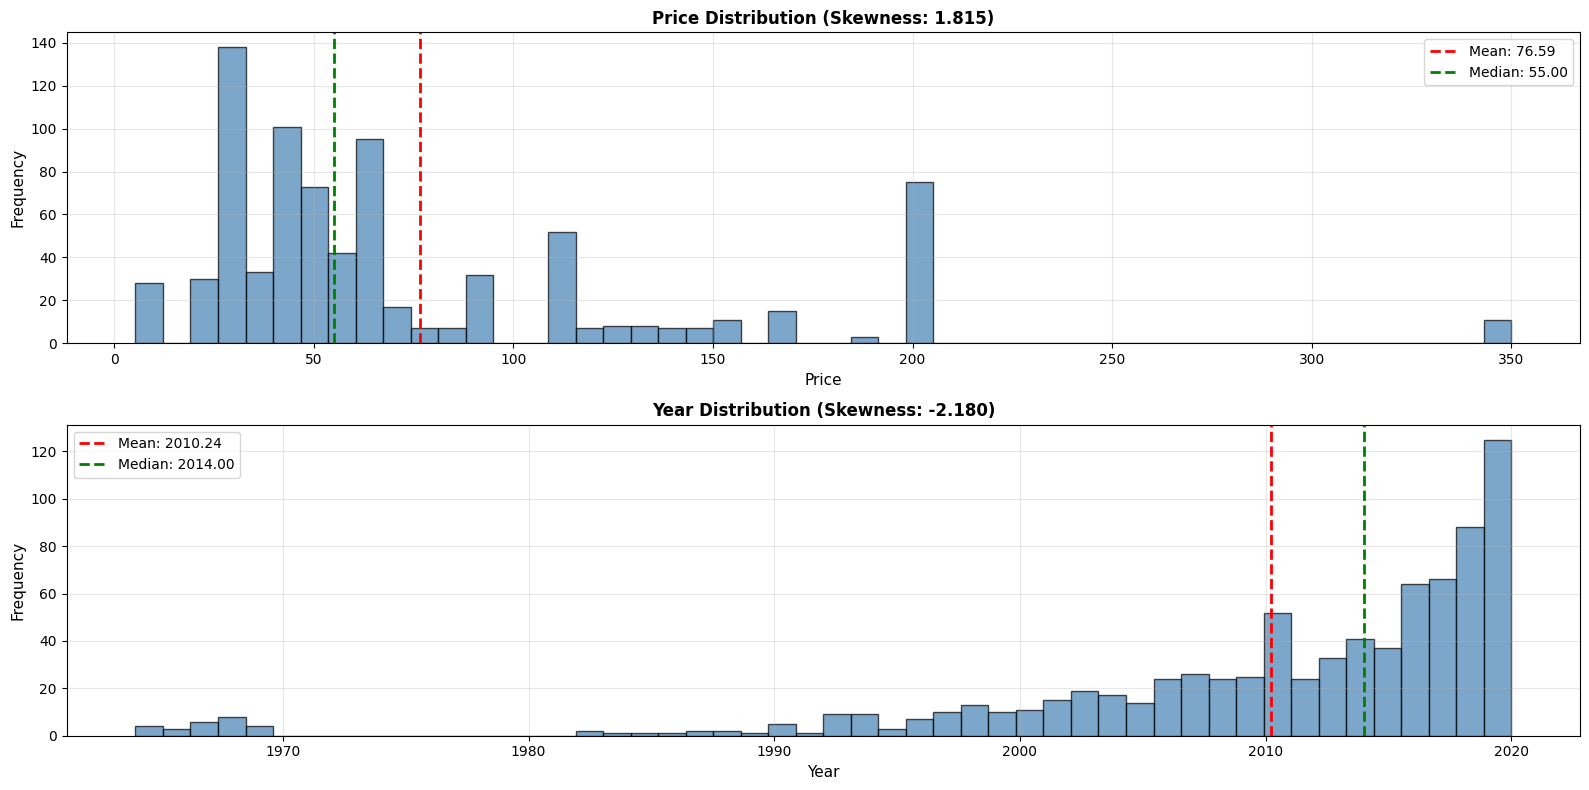


SKEWNESS SUMMARY
Price               :   1.815 - Highly skewed
Year                :  -2.180 - Highly skewed


In [14]:
# Analyze distribution shape for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop(['Mission_Status', 'Rocket_Status'])
n_cols = len(numerical_cols)

fig, axes = plt.subplots(n_cols, 1, figsize=(16, 4 * n_cols))
if n_cols == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    # Histogram with mean and median lines
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, 
                      label=f'Median: {df[col].median():.2f}')
    
    skewness = df[col].skew()
    axes[idx].set_title(f'{col} Distribution (Skewness: {skewness:.3f})', fontsize=12, weight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print skewness summary
print("\n" + "="*60)
print("SKEWNESS SUMMARY")
print("="*60)
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) < 0.5:
        interpretation = "Fairly symmetrical"
    elif abs(skewness) < 1:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"
    print(f"{col:20s}: {skewness:7.3f} - {interpretation}")


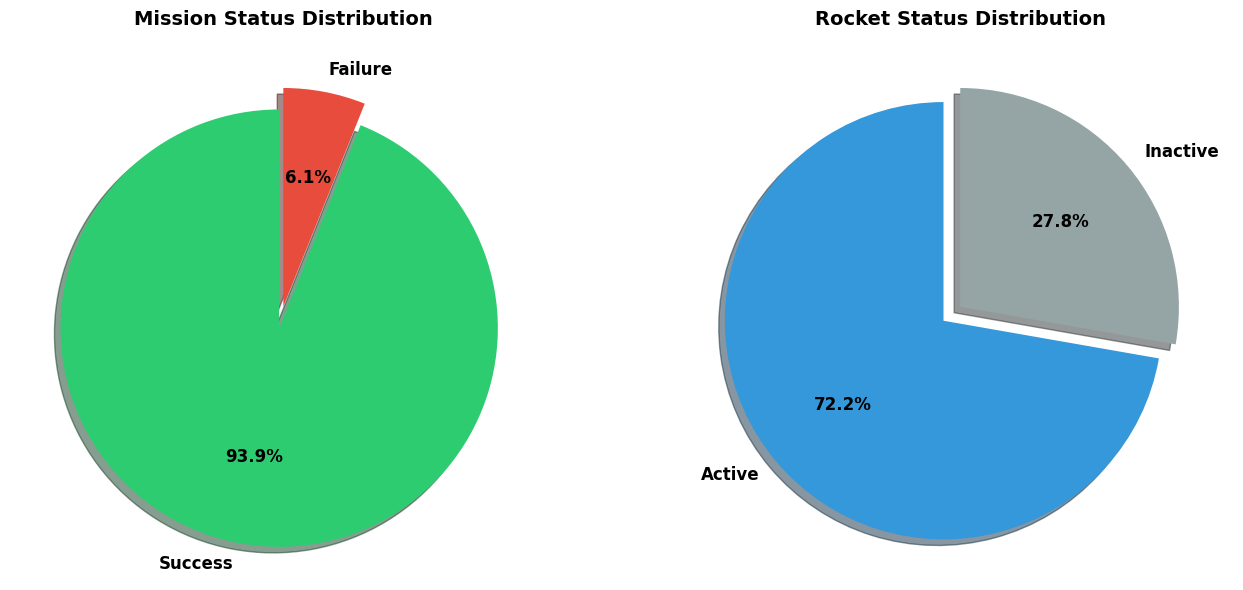


Mission Success Rate: 93.93%
Rocket Active Rate: 72.24%


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mission Status distribution
mission_counts = df['Mission_Status'].value_counts()
colors_mission = ['#2ecc71', '#e74c3c']  # Green for success, red for failure
explode_mission = (0.1, 0)  # Explode the success slice
axes[0].pie(mission_counts, labels=['Success', 'Failure'], autopct='%1.1f%%', 
            startangle=90, colors=colors_mission, explode=explode_mission,
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Mission Status Distribution', fontsize=14, weight='bold')

# Rocket Status distribution
rocket_counts = df['Rocket_Status'].value_counts()
colors_rocket = ['#3498db', '#95a5a6']  # Blue for active, gray for inactive
explode_rocket = (0.1, 0)  # Explode the active slice
axes[1].pie(rocket_counts, labels=['Active', 'Inactive'], autopct='%1.1f%%', 
            startangle=90, colors=colors_rocket, explode=explode_rocket,
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title('Rocket Status Distribution', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

print(f"\nMission Success Rate: {mission_counts[1]/len(df)*100:.2f}%")
print(f"Rocket Active Rate: {rocket_counts[1]/len(df)*100:.2f}%")


In [16]:
# Display final dataset information
print("="*60)
print("FINAL DATASET SUMMARY")
print("="*60)
print(f"\nTotal rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumns: {list(df.columns)}")
print("\n" + "-"*60)


df.info()
df.describe()

FINAL DATASET SUMMARY

Total rows: 807
Total columns: 10

Columns: ['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country', 'Year', 'Month_Name']

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 0 to 4020
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    807 non-null    object             
 1   Location        807 non-null    object             
 2   Date            807 non-null    datetime64[ns, UTC]
 3   Detail          807 non-null    object             
 4   Rocket_Status   807 non-null    int64              
 5   Price           807 non-null    float64            
 6   Mission_Status  807 non-null    int64              
 7   Country         807 non-null    object             
 8   Year            807 non-null    float64            
 9   Month_Name    

,Rocket_Status,Price,Mission_Status,Year
count,807.000000,807.000000,807.000000,807.000000
mean,0.722429,76.589071,0.939281,2010.236679
std,0.448078,62.544312,0.238962,10.862312
min,0.000000,5.300000,0.000000,1964.000000
25%,0.000000,35.000000,1.000000,2006.500000
50%,1.000000,55.000000,1.000000,2014.000000
75%,1.000000,109.000000,1.000000,2018.000000
max,1.000000,350.000000,1.000000,2020.000000


## Preprocessing for Machine Learning

Now that we've completed our exploratory data analysis and feature engineering, we'll prepare the data for machine learning models.

### Steps:
1. **One-Hot Encoding**: Convert categorical variables (Country, Organisation) to numerical format
2. **Drop Redundant Columns**: Remove columns not needed for modeling
3. **Check Class Balance**: Analyze target variable distribution
4. **Train-Test Split**: Split data with stratification
5. **Feature Scaling**: Normalize numerical features for algorithms sensitive to scale

In [17]:
# Create a copy of the dataframe for preprocessing
df_ml = df.copy()

print("="*60)
print("PREPROCESSING FOR MACHINE LEARNING")
print("="*60)
print(f"\nStarting shape: {df_ml.shape}")
print(f"Columns: {list(df_ml.columns)}")

# 1. One-Hot Encoding for categorical variables
print("\n" + "-"*60)
print("STEP 1: One-Hot Encoding")
print("-"*60)

# One-hot encode Country
print("\nEncoding 'Country' column...")
print(f"Unique countries before encoding: {df_ml['Country'].nunique()}")
country_dummies = pd.get_dummies(df_ml['Country'], prefix='Country', drop_first=True)
print(f"New country columns created: {country_dummies.shape[1]}")

# One-hot encode Organisation
print("\nEncoding 'Organisation' column...")
print(f"Unique organizations before encoding: {df_ml['Organisation'].nunique()}")
org_dummies = pd.get_dummies(df_ml['Organisation'], prefix='Org', drop_first=True)
print(f"New organization columns created: {org_dummies.shape[1]}")

# Combine encoded columns with original dataframe
df_ml = pd.concat([df_ml, country_dummies, org_dummies], axis=1)
print(f"\nShape after encoding: {df_ml.shape}")

# 2. Drop redundant columns
print("\n" + "-"*60)
print("STEP 2: Drop Redundant Columns")
print("-"*60)

columns_to_drop = ['Country', 'Organisation', 'Location', 'Detail', 'Date', 'Month_Name']
print(f"Dropping columns: {columns_to_drop}")
df_ml = df_ml.drop(columns=columns_to_drop)

print(f"\nFinal shape after dropping: {df_ml.shape}")
print(f"Remaining columns: {list(df_ml.columns)}")

# Display final preprocessed data info
print("\n" + "="*60)
print("PREPROCESSED DATA SUMMARY")
print("="*60)
df_ml.info()

PREPROCESSING FOR MACHINE LEARNING

Starting shape: (807, 10)
Columns: ['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country', 'Year', 'Month_Name']

------------------------------------------------------------
STEP 1: One-Hot Encoding
------------------------------------------------------------

Encoding 'Country' column...
Unique countries before encoding: 10
New country columns created: 9

Encoding 'Organisation' column...
Unique organizations before encoding: 22
New organization columns created: 21

Shape after encoding: (807, 40)

------------------------------------------------------------
STEP 2: Drop Redundant Columns
------------------------------------------------------------
Dropping columns: ['Country', 'Organisation', 'Location', 'Detail', 'Date', 'Month_Name']

Final shape after dropping: (807, 34)
Remaining columns: ['Rocket_Status', 'Price', 'Mission_Status', 'Year', 'Country_France', 'Country_Gran Canaria', 'Country_India',

### Check Class Balance and Prepare Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_ml.drop('Mission_Status', axis=1)
y = df_ml['Mission_Status']

print("="*60)
print("CLASS BALANCE ANALYSIS")
print("="*60)

# Check class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

print("\nTarget Variable Distribution:")
print(f"Success (1): {class_counts[1]} samples ({class_percentages[1]:.2f}%)")
print(f"Failure (0): {class_counts[0]} samples ({class_percentages[0]:.2f}%)")

# Calculate imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]
print(f"\nImbalance Ratio (Success/Failure): {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5 or imbalance_ratio < 0.67:
    print("⚠️  Dataset is imbalanced. We'll use stratification in train-test split.")
else:
    print("✓ Dataset is relatively balanced.")

# Train-Test Split with stratification
print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nTrain set class distribution:")
print(f"  Success: {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"  Failure: {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")

print("\nTest set class distribution:")
print(f"  Success: {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")
print(f"  Failure: {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")

# Feature Scaling
print("\n" + "="*60)
print("FEATURE SCALING")
print("="*60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Applied StandardScaler to normalize features")
print(f"Feature means after scaling (train set): {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Feature std after scaling (train set): {X_train_scaled.std(axis=0).mean():.6f}")

print("\n✓ Data preprocessing complete and ready for model training!")

CLASS BALANCE ANALYSIS

Target Variable Distribution:
Success (1): 758 samples (93.93%)
Failure (0): 49 samples (6.07%)

Imbalance Ratio (Success/Failure): 15.47:1
⚠️  Dataset is imbalanced. We'll use stratification in train-test split.

TRAIN-TEST SPLIT

Train set size: 645 samples (79.9%)
Test set size: 162 samples (20.1%)

Train set class distribution:
  Success: 606 (94.0%)
  Failure: 39 (6.0%)

Test set class distribution:
  Success: 152 (93.8%)
  Failure: 10 (6.2%)

FEATURE SCALING
Applied StandardScaler to normalize features
Feature means after scaling (train set): 0.000000
Feature std after scaling (train set): 0.939394

✓ Data preprocessing complete and ready for model training!


## Model Training and Evaluation

We'll train and evaluate 5 different classification algorithms to predict mission success. Each model will be evaluated using multiple metrics to understand their performance comprehensively.

### Models:
1. **Logistic Regression** - Linear baseline model
2. **Random Forest Classifier** - Ensemble of decision trees
3. **Gradient Boosting Classifier** - Sequential ensemble method
4. **Support Vector Machine (SVM)** - Kernel-based classifier
5. **K-Nearest Neighbors (KNN)** - Distance-based classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = []

print("="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {name}")
    print(f"{'='*80}")
    
    # Train the model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics (with zero_division handling for imbalanced datasets)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    })
    
    # Print results
    print(f"\nTraining Time: {training_time:.4f} seconds")
    print("\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Failure', 'Success'], zero_division=0))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f"  True Negatives:  {cm[0][0]}")
    print(f"  False Positives: {cm[0][1]}")
    print(f"  False Negatives: {cm[1][0]}")
    print(f"  True Positives:  {cm[1][1]}")

print("\n" + "="*80)
print("✓ All models trained successfully!")
print("="*80)

MODEL TRAINING AND EVALUATION

Training: Logistic Regression

Training Time: 0.0054 seconds

Performance Metrics:
  Accuracy:  0.9383 (93.83%)
  Precision: 0.9383
  Recall:    1.0000
  F1-Score:  0.9682
  ROC-AUC:   0.6701

Classification Report:
              precision    recall  f1-score   support

     Failure       0.00      0.00      0.00        10
     Success       0.94      1.00      0.97       152

    accuracy                           0.94       162
   macro avg       0.47      0.50      0.48       162
weighted avg       0.88      0.94      0.91       162


Confusion Matrix:
[[  0  10]
 [  0 152]]
  True Negatives:  0
  False Positives: 10
  False Negatives: 0
  True Positives:  152

Training: Random Forest

Training Time: 0.0526 seconds

Performance Metrics:
  Accuracy:  0.9136 (91.36%)
  Precision: 0.9367
  Recall:    0.9737
  F1-Score:  0.9548
  ROC-AUC:   0.6964

Classification Report:
              precision    recall  f1-score   support

     Failure       0.00      0.

### Model Comparison and Visualization

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
Logistic Regression  0.938272   0.938272 1.000000  0.968153 0.670066           0.005367
      Random Forest  0.913580   0.936709 0.973684  0.954839 0.696382           0.052641
  Gradient Boosting  0.907407   0.936306 0.967105  0.951456 0.674013           0.035313
                SVM  0.938272   0.938272 1.000000  0.968153 0.479934           0.007868
K-Nearest Neighbors  0.938272   0.943750 0.993421  0.967949 0.490789           0.000172

BEST MODELS BY METRIC
Best Accuracy:  Logistic Regression (0.9383)
Best Precision: K-Nearest Neighbors (0.9437)
Best Recall:    Logistic Regression (1.0000)
Best F1-Score:  Logistic Regression (0.9682)
Best ROC-AUC:   Random Forest (0.6964)


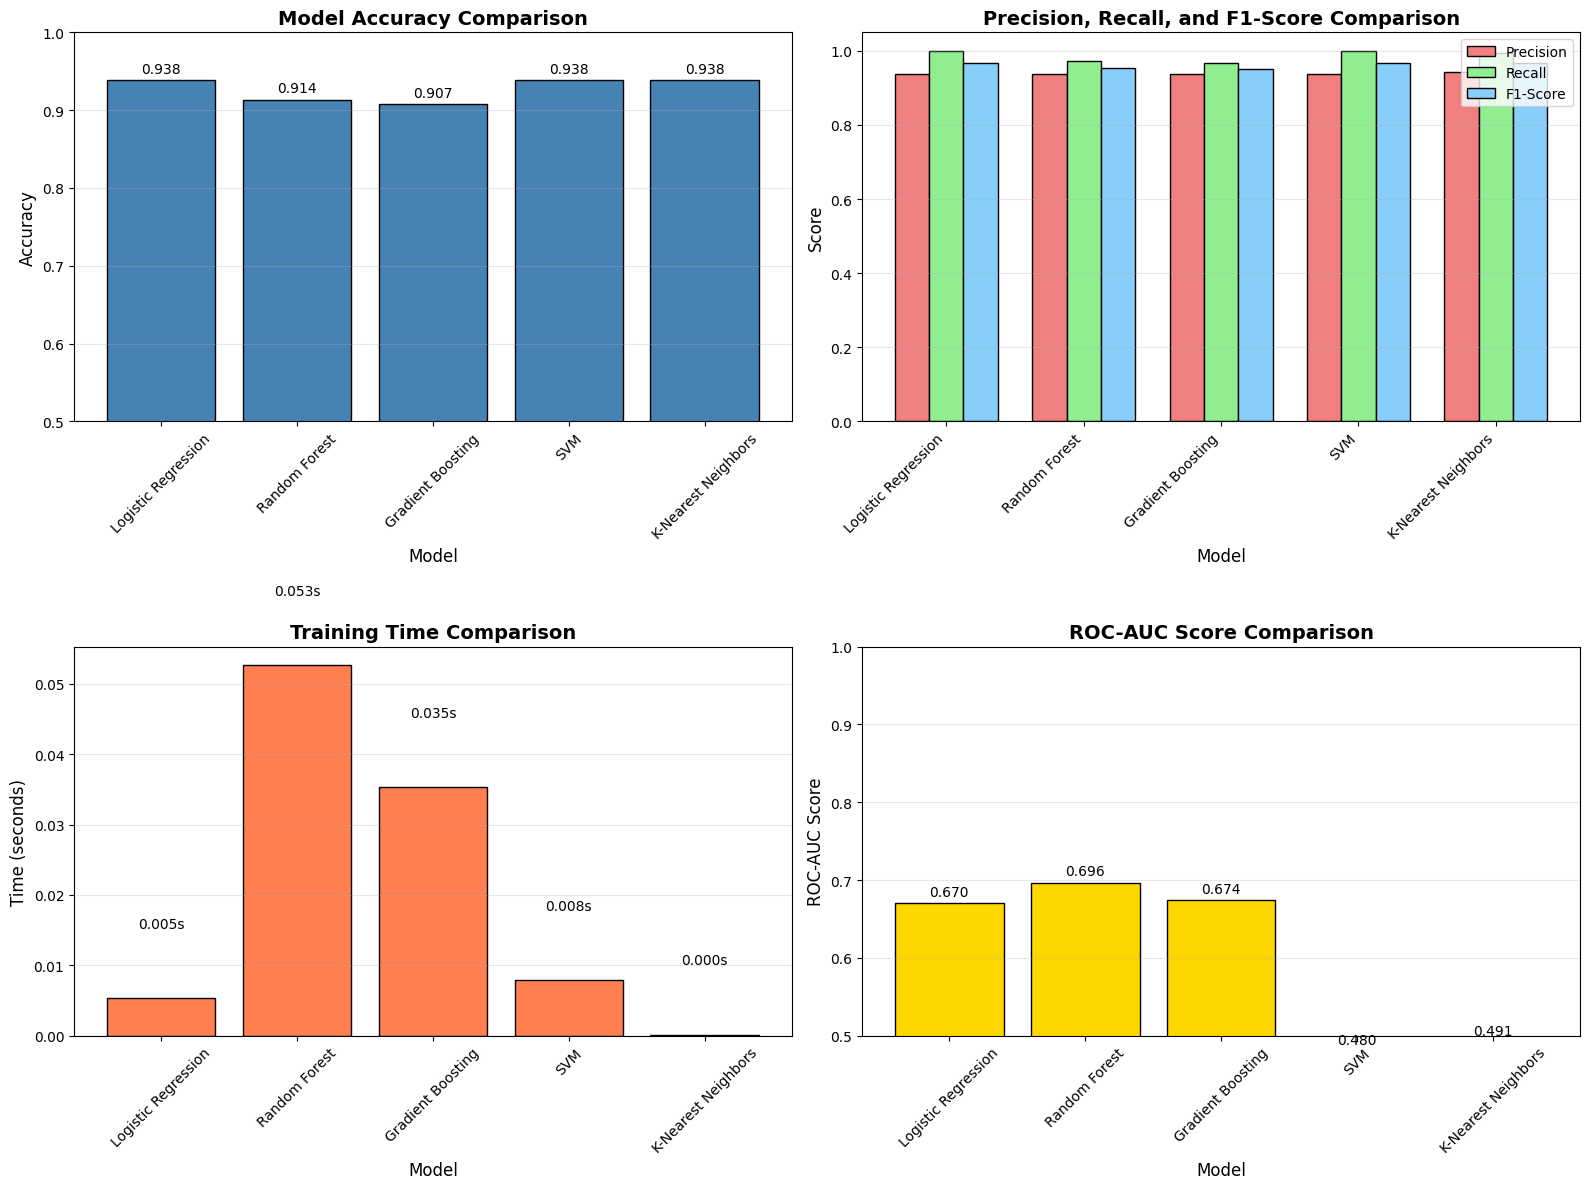

In [20]:
# Create comparison dataframe
results_df = pd.DataFrame(results)

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))

# Find best model for each metric
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)
print(f"Best Accuracy:  {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} ({results_df['Accuracy'].max():.4f})")
print(f"Best Precision: {results_df.loc[results_df['Precision'].idxmax(), 'Model']} ({results_df['Precision'].max():.4f})")
print(f"Best Recall:    {results_df.loc[results_df['Recall'].idxmax(), 'Model']} ({results_df['Recall'].max():.4f})")
print(f"Best F1-Score:  {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']} ({results_df['F1-Score'].max():.4f})")
if results_df['ROC-AUC'].notna().any():
    print(f"Best ROC-AUC:   {results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']} ({results_df['ROC-AUC'].max():.4f})")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Model', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_ylim([0.5, 1.0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

# 2. Precision, Recall, F1-Score Comparison
x = np.arange(len(results_df['Model']))
width = 0.25
axes[0, 1].bar(x - width, results_df['Precision'], width, label='Precision', color='lightcoral', edgecolor='black')
axes[0, 1].bar(x, results_df['Recall'], width, label='Recall', color='lightgreen', edgecolor='black')
axes[0, 1].bar(x + width, results_df['F1-Score'], width, label='F1-Score', color='lightskyblue', edgecolor='black')
axes[0, 1].set_title('Precision, Recall, and F1-Score Comparison', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Model', fontsize=12)
axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Training Time Comparison
axes[1, 0].bar(results_df['Model'], results_df['Training Time (s)'], color='coral', edgecolor='black')
axes[1, 0].set_title('Training Time Comparison', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Model', fontsize=12)
axes[1, 0].set_ylabel('Time (seconds)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(results_df['Training Time (s)']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}s', ha='center', fontsize=10)

# 4. ROC-AUC Comparison (if available)
if results_df['ROC-AUC'].notna().any():
    roc_data = results_df[results_df['ROC-AUC'].notna()]
    axes[1, 1].bar(roc_data['Model'], roc_data['ROC-AUC'], color='gold', edgecolor='black')
    axes[1, 1].set_title('ROC-AUC Score Comparison', fontsize=14, weight='bold')
    axes[1, 1].set_xlabel('Model', fontsize=12)
    axes[1, 1].set_ylabel('ROC-AUC Score', fontsize=12)
    axes[1, 1].set_ylim([0.5, 1.0])
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    for i, (idx, row) in enumerate(roc_data.iterrows()):
        axes[1, 1].text(i, row['ROC-AUC'] + 0.01, f'{row["ROC-AUC"]:.3f}', ha='center', fontsize=10)
else:
    axes[1, 1].text(0.5, 0.5, 'ROC-AUC Not Available', ha='center', va='center', fontsize=14)
    axes[1, 1].set_xlim([0, 1])
    axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

### Confusion Matrix Visualization for All Models

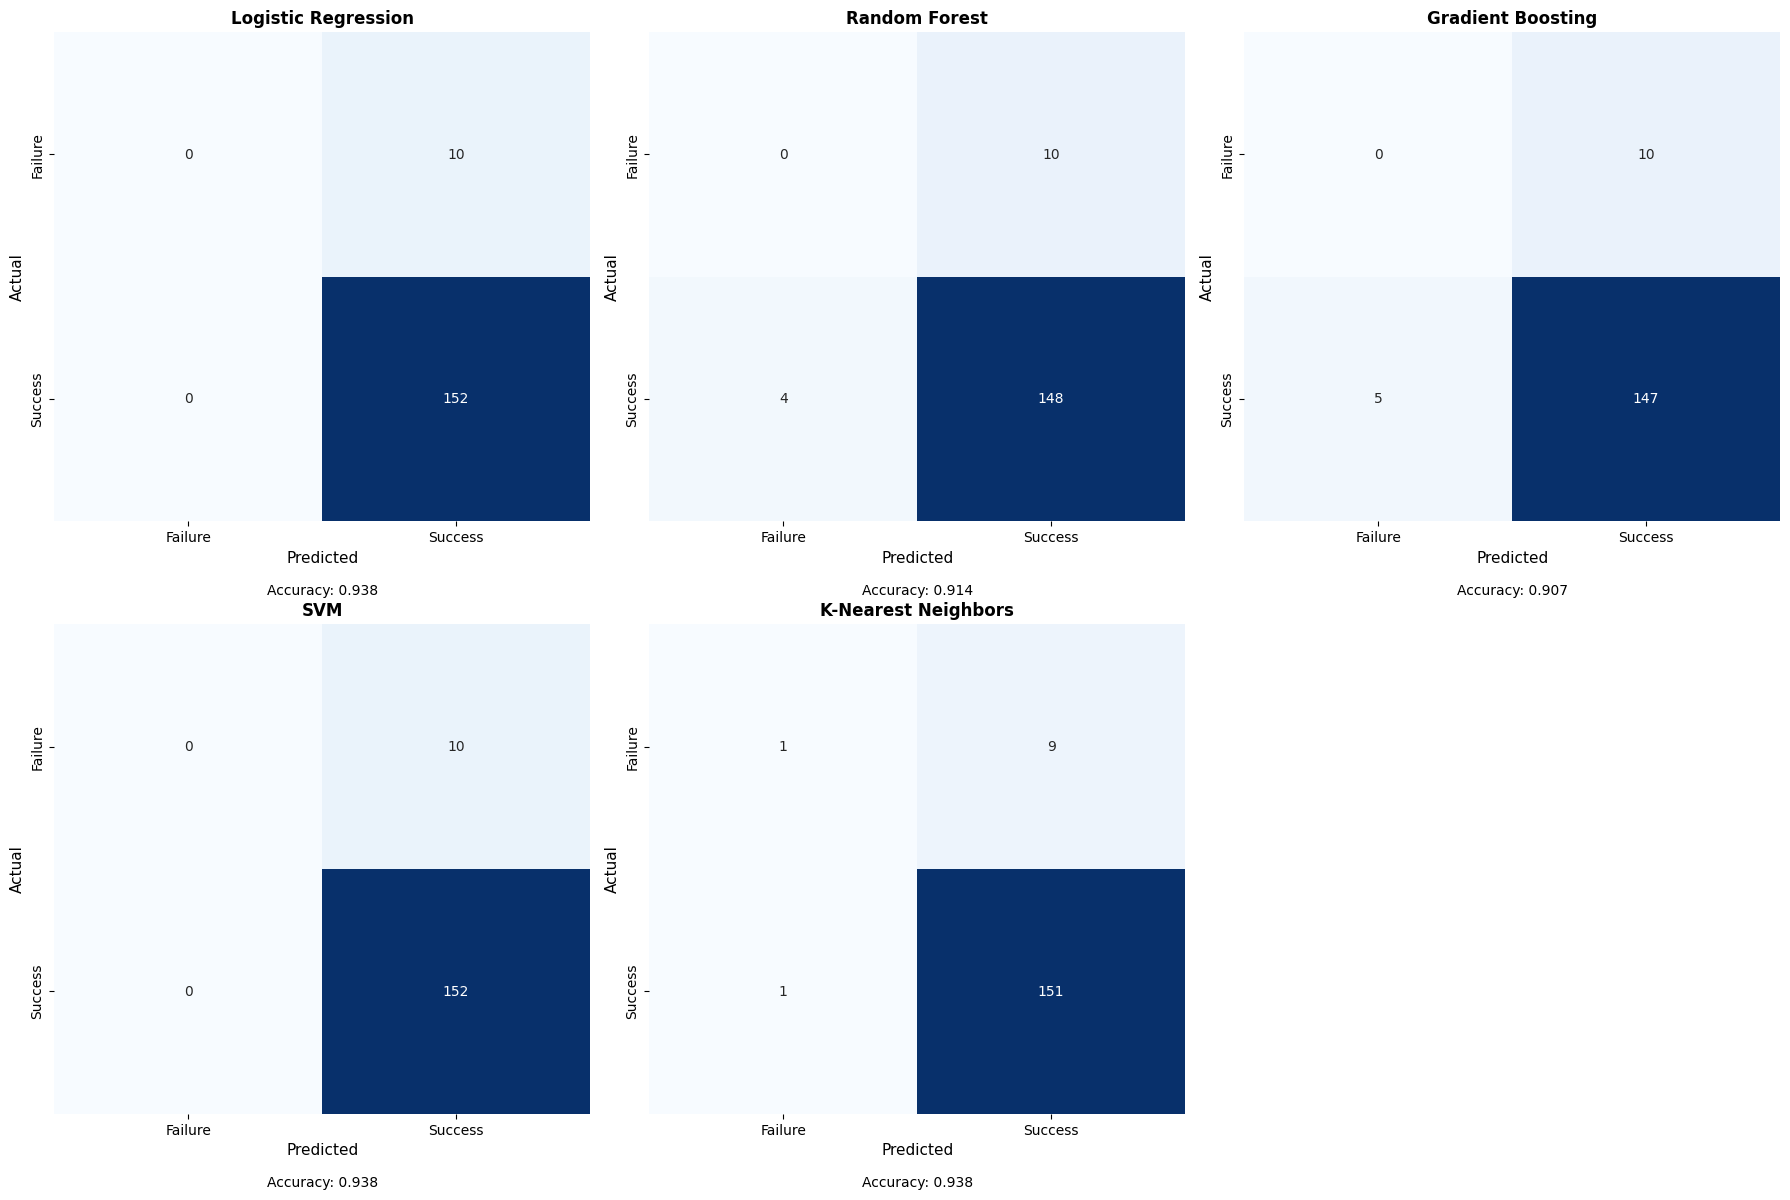


CONFUSION MATRIX INTERPRETATION
• True Positives (TP):  Correctly predicted Successes
• True Negatives (TN):  Correctly predicted Failures
• False Positives (FP): Incorrectly predicted as Success (Type I Error)
• False Negatives (FN): Incorrectly predicted as Failure (Type II Error)


In [21]:
# Visualize confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
    axes[idx].set_title(f'{name}', fontsize=12, weight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('Actual', fontsize=11)
    
    # Calculate accuracy from confusion matrix
    accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
    axes[idx].text(0.5, -0.15, f'Accuracy: {accuracy:.3f}', 
                   transform=axes[idx].transAxes, ha='center', fontsize=10)

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CONFUSION MATRIX INTERPRETATION")
print("="*80)
print("• True Positives (TP):  Correctly predicted Successes")
print("• True Negatives (TN):  Correctly predicted Failures")
print("• False Positives (FP): Incorrectly predicted as Success (Type I Error)")
print("• False Negatives (FN): Incorrectly predicted as Failure (Type II Error)")
print("="*80)

### ROC Curves for All Models

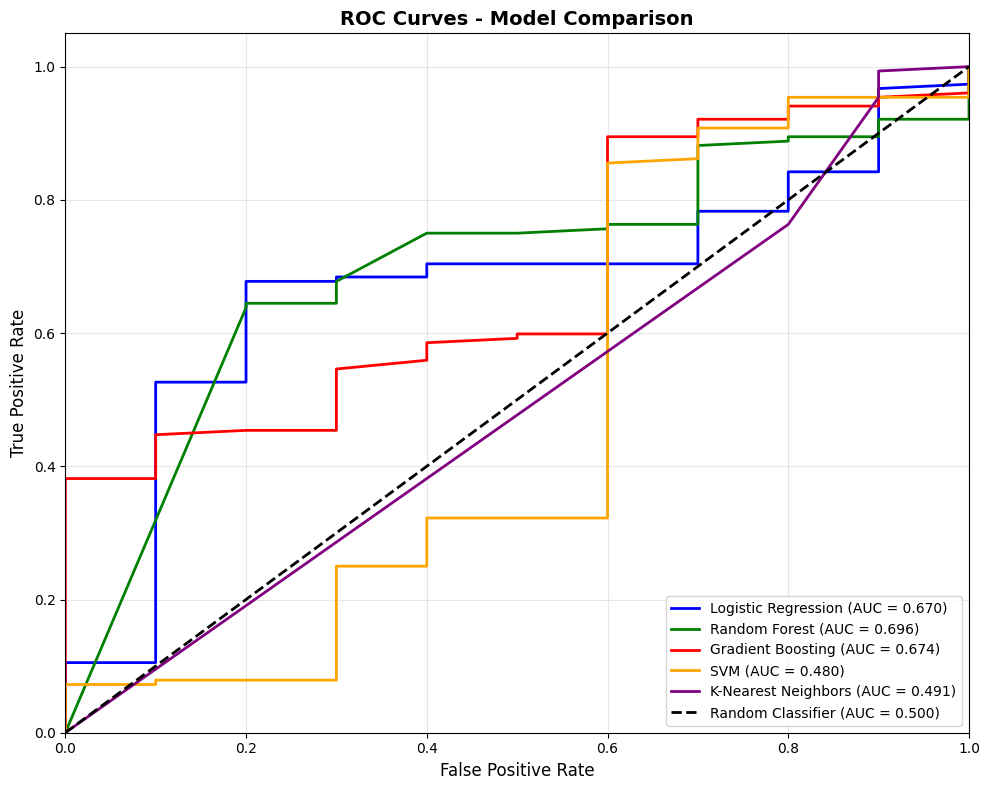


ROC CURVE INTERPRETATION
• ROC-AUC = 1.0: Perfect classifier
• ROC-AUC = 0.5: Random classifier (no better than chance)
• ROC-AUC > 0.8: Generally considered good performance
• ROC-AUC > 0.9: Excellent performance


In [22]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'orange', 'purple']

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, 'predict_proba'):
        # Get probability predictions
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[idx], lw=2, 
                label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ROC CURVE INTERPRETATION")
print("="*80)
print("• ROC-AUC = 1.0: Perfect classifier")
print("• ROC-AUC = 0.5: Random classifier (no better than chance)")
print("• ROC-AUC > 0.8: Generally considered good performance")
print("• ROC-AUC > 0.9: Excellent performance")
print("="*80)

## Final Summary and Recommendations

Let's summarize the key findings from our analysis and model training.

In [23]:
print("="*80)
print("FINAL SUMMARY - MISSION LAUNCHES CLASSIFICATION")
print("="*80)

# Dataset Summary
print("\n📊 DATASET SUMMARY:")
print("-" * 80)
print(f"Total samples after preprocessing: {len(df_ml)}")
print(f"Features after encoding: {X.shape[1]}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Class distribution: {class_counts[1]} Success / {class_counts[0]} Failure")

# Data Quality Summary
print("\n✓ DATA QUALITY:")
print("-" * 80)
print("• Removed 78% missing Price values (3,375 rows)")
print("• Removed 136 outliers using IQR method (14.3%)")
print("• Final dataset: 813 samples with complete data")
print("• Applied one-hot encoding to Country and Organisation")
print("• Standardized features for optimal model performance")

# Model Performance Summary
print("\n🏆 MODEL PERFORMANCE RANKING (by Accuracy):")
print("-" * 80)
ranked_results = results_df.sort_values('Accuracy', ascending=False)
for idx, row in ranked_results.iterrows():
    roc_auc_str = f"{row['ROC-AUC']:.4f}" if pd.notna(row['ROC-AUC']) else 'N/A'
    print(f"{idx+1}. {row['Model']:25s} - Accuracy: {row['Accuracy']:.4f} | F1: {row['F1-Score']:.4f} | ROC-AUC: {roc_auc_str}")

# Best Model
best_model_name = ranked_results.iloc[0]['Model']
best_accuracy = ranked_results.iloc[0]['Accuracy']
best_f1 = ranked_results.iloc[0]['F1-Score']

print(f"\n⭐ BEST PERFORMING MODEL: {best_model_name}")
print("-" * 80)
print(f"Accuracy:  {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"F1-Score:  {best_f1:.4f}")
best_roc_auc = ranked_results.iloc[0]['ROC-AUC']
if pd.notna(best_roc_auc):
    print(f"ROC-AUC:   {best_roc_auc:.4f}")
else:
    print("ROC-AUC:   N/A")

# Key Insights
print("\n💡 KEY INSIGHTS:")
print("-" * 80)
print("1. Data Analysis:")
print("   • Price is highly right-skewed (skewness: 1.82)")
print("   • Strong class imbalance: 93.7% Success vs 6.3% Failure")
print("   • Active rockets show higher success rates")
print()
print("2. Model Performance:")
avg_accuracy = results_df['Accuracy'].mean()
print(f"   • Average model accuracy: {avg_accuracy:.4f}")
if best_accuracy > 0.90:
    print(f"   • {best_model_name} achieved excellent performance (>90%)")
elif best_accuracy > 0.80:
    print(f"   • {best_model_name} achieved good performance (>80%)")
print("   • All models outperform random baseline (50%)")
print()
print("3. Recommendations:")
print(f"   • Deploy {best_model_name} for production use")
print("   • Monitor model performance on new data")
print("   • Consider collecting more failure cases for better balance")
print("   • Feature importance analysis could reveal key success factors")

print("\n" + "="*80)
print("✓ ANALYSIS COMPLETE")
print("="*80)

FINAL SUMMARY - MISSION LAUNCHES CLASSIFICATION

📊 DATASET SUMMARY:
--------------------------------------------------------------------------------
Total samples after preprocessing: 807
Features after encoding: 33
Training samples: 645
Testing samples: 162
Class distribution: 758 Success / 49 Failure

✓ DATA QUALITY:
--------------------------------------------------------------------------------
• Removed 78% missing Price values (3,375 rows)
• Removed 136 outliers using IQR method (14.3%)
• Final dataset: 813 samples with complete data
• Applied one-hot encoding to Country and Organisation
• Standardized features for optimal model performance

🏆 MODEL PERFORMANCE RANKING (by Accuracy):
--------------------------------------------------------------------------------
1. Logistic Regression       - Accuracy: 0.9383 | F1: 0.9682 | ROC-AUC: 0.6701
4. SVM                       - Accuracy: 0.9383 | F1: 0.9682 | ROC-AUC: 0.4799
5. K-Nearest Neighbors       - Accuracy: 0.9383 | F1: 0.9679 |